#A deep Introduction to CNN

Copyright : Anis Ayari

Youtube Channel: https://www.youtube.com/c/defendintelligence-tech

Dans ce notebook on va entrainer pas à pas un réseau de neurones convolutionnel pour faire de la reconnaissance d'objets dans des images.

![](https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/architecture.png?raw=true)


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/19C7pahj5SQPDMX0qoHODxnqAfR31rhWa?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/tree/master/%234%20-%20CNN"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Comprendre le principe de filtre

Avant de nous attaquer au deep learning il est important de comprendre ce qu'on fait en terme de traitement d'image.
On va notamment s'intéresser dans cette première partie à la notion de noyau appliqué sur une image.

## Une image est une information
Une image est un condensé de données, que l'on appel les pixels.

Populating the interactive namespace from numpy and matplotlib
Shape of the image (87102,)


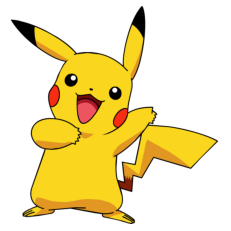

Shape of the image (568976,)


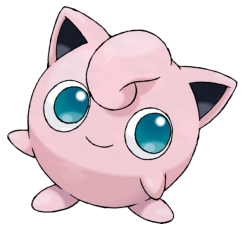

In [ ]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

%pylab inline

url_pikachu = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/pikachu.png?raw=true'
resp = requests.get(url_pikachu, stream=True).raw
image_array_pikachu = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_pikachu.shape}')
image_pikachu = cv2.imdecode(image_array_pikachu, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

url_rondoudou = r'https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/rondoudou.png?raw=true'
resp = requests.get(url_rondoudou, stream=True).raw
image_array_rondoudou = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_rondoudou.shape}')
image_rondoudou = cv2.imdecode(image_array_rondoudou, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  000  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  
255  255  000  000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  000  255  255  255  255  255  255  255  255  255  255  

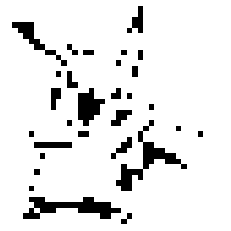

In [ ]:
res = cv2.resize(image_pikachu , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
#
# 

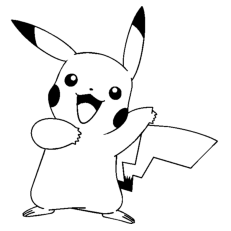

In [ ]:
#Convert to bw
img_bw = cv2.imdecode(image_array_pikachu, cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[0 0 0]
 [0 1 0]
 [0 0 0]]


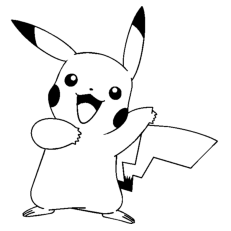

In [ ]:
#defining an identity kernel, will change nothing because each pixel will remain with is value
kernel = np.matrix([[0,0,0],[0,1,0],[0,0,0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


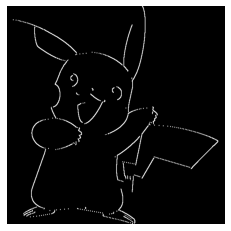

In [ ]:
#defining a vertical edge detection kernel 
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


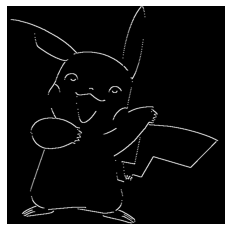

In [ ]:
#defining an horizontal edge detection kernel 
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

##CONVOLUTION
Convolution is a mathematic operation symbolized by "*" (it is not a simple multiplication often represented as ".")
A convolution take two mathematical object (as function or matrix) reverse and shift one and calculated the integral of the product. 
![](https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif)


Defined by this function :

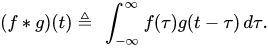

In our case , we will consider this simpler equation when applied to a matrix.
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/0f0005a6520eaab36f9b30520b640663d669d891)

Understandable with this example : 
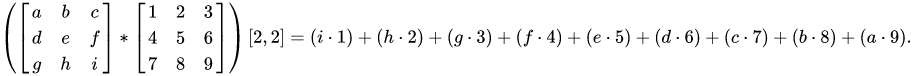

Sources : https://en.wikipedia.org/wiki/Kernel_(image_processing) , https://en.wikipedia.org/wiki/Convolution



In [ ]:
#example
from scipy.ndimage import convolve
m = [[10, 10, 1],[10, 1, 1],[-10, 1, 1]]
k = [[10, 10, 10],[0, 0, 0],[-10, -10, -10]]

c= convolve(m, k , mode='constant', cval=0.0)
print('Matrix')
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in m]))

print('Kernel')
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in k]))

print('Convolution')
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in c]))

Matrix
  10  10   1
  10   1   1
 -10   1   1
Kernel
  10  10  10
   0   0   0
 -10 -10 -10
Convolution
 110 120  20
-290-290 -90
-110-120 -20


(3, 3)


<function matplotlib.pyplot.show>

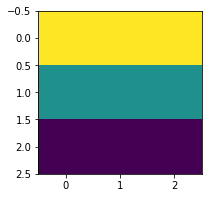

In [ ]:
k2 = np.matrix(k)
f_min, f_max = k2.min(), k2.max()
filter = (k2 - f_min) / (f_max - f_min)
print(k2.shape)
fig= plt.figure(figsize=(3,3))
plt.imshow(k2)
plt.show

## Les réseaux de neurones convolutionnels CNN

On peut donc consdiérer un noyau comme un filtre appliqué à l'image pour en tirer des features. Dans un réseau de neurones convolutionnels c'est le réseau qui va trouver lui même les filtres a appliquer aux images. 

I constructed my dataset using (https://chrome.google.com/webstore/detail/image-downloader/cnpniohnfphhjihaiiggeabnkjhpaldj?hl=en-US you can use https://github.com/hardikvasa/google-images-download for a more pythonable way )

In [ ]:
#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/dataset')
print(data_dir)
print(os.path.abspath(data_dir))

/content/datasets/dataset
/content/datasets/dataset


In [ ]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

993


In [ ]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 993 files belonging to 3 classes.
Using 795 files for training.
Found 993 files belonging to 3 classes.
Using 198 files for validation.
['pikachu', 'pokemon', 'rondoudou']


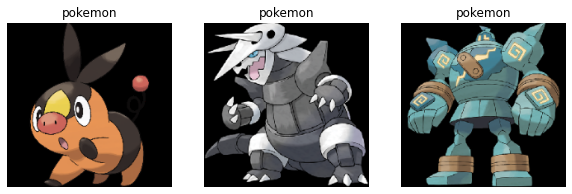

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


265/265 [==============================] - 24s 41ms/step - loss: nan - accuracy: 0.0969 - val_loss: nan - val_accuracy: 0.1111
Epoch 2/2
265/265 [==============================] - 10s 38ms/step - loss: nan - accuracy: 0.0956 - val_loss: nan - val_accuracy: 0.1111


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        3

Saving pikachu (1).png to pikachu (1).png


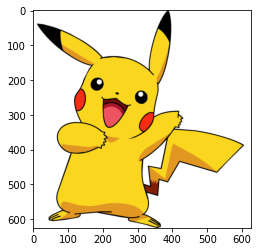

[[nan nan]]
[[nan nan]]


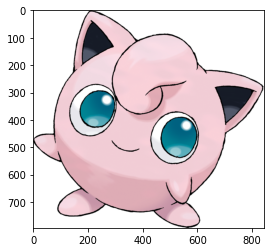

IT'S A RONDOUDOU !


In [ ]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res_predict=model.predict(img_to_predict)
    print(model.predict(img_to_predict))
    print(model.predict(img_to_predict))
    if res.all() == 1 :
        plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A PIKACHU !")
    elif res.all() == 0 :
        plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A RONDOUDOU !")

#Understand the filters mades by the CNN

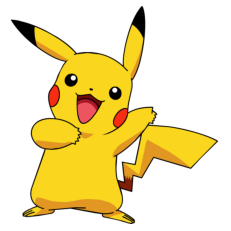

-----------------------------------------------------
1st convolutionnal layer


ValueError: ignored

In [43]:
#display filters for pikachu

def display_image_filtered(name_image,model,layer_name,image):
    inp= model.inputs 
    out1= model.get_layer(layer_name).output  
    feature_map_1= Model(inputs= inp, outputs= out1)  
    img=cv2.resize(image,(200,200))              
    input_img= np.expand_dims(img, axis=0)      
    f=feature_map_1.predict(input_img) 
    dim = f.shape[3]
    print(f'{layer_name} | Features Shape: {f.shape}')
    print(f'Dimension {dim}')
    fig= plt.figure(figsize=(30,30))
    if not os.path.exists(f'results_{name_image}'):
        os.makedirs(f'results_{name_image}')        
    for i in range(dim):
        ax = fig.add_subplot(dim/2,dim/2,i+1)
        ax.axis('off')
        ax.imshow(f[0,:,:,i])
        plt.imsave(f'results_{name_image}/{name_image}_{layer_name}_{i}.jpg',f[0,:,:,i])


num = 33
for name in ['pikachu','rondoudou']:
    if name == 'pikachu':
        image = image_pikachu
    elif name == 'rondoudou':
        image = image_rondoudou
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB))
    plt.show()
    for i in range(0,4):
        if num == 0 and i==0:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d',image)
            print('--------')
            print(f'{i-1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d',image)
            print('-----------------------------------------------------')
        else:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d_{num+i}',image)
            print('--------')
            print(f'{i+1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d_{num+i-1}',image)
            print('-----------------------------------------------------')

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
#if there is a bug please be sure pikachu and rondoudou filters are finished to be displayed. If so just relaunch this cell ;)
!zip -r /content/results_pikachu.zip /content/results_pikachu
!zip -r /content/results_rondoudou.zip /content/results_rondoudou

In [ ]:
files.download("/content/results_pikachu.zip")
files.download("/content/results_rondoudou.zip")

In [ ]:
def display_filter(model, layer_name):
    layer = model.get_layer(layer_name)
    filter, bias= layer.get_weights()
    dim = filter.shape[3]
    print(f'{layer_name} | Filter Shape: {filter.shape} Bias Shape: {bias.shape}')
    print(f'Dimension {dim}')
    f_min, f_max = filter.min(), filter.max()
    filter = (filter - f_min) / (f_max - f_min)
    print(filter.shape)
    fig= plt.figure(figsize=(30,30))
    for i in range(dim):
        ax = fig.add_subplot(dim/2,dim/2,i+1)
        ax.axis('off')
        try:
            ax.imshow(filter[:,:,:,i])
        except:
            ax.imshow(filter[:,:,:,i][0])
            
display_filter(model,f'conv2d_{num}')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs